<a href="https://colab.research.google.com/github/VladislavVolkovS/covid-19-analysis/blob/main/%22covid19_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 - Загружаем данные и библиотеки#

---



In [ ]:
# Data wrangling
import pandas as pd
import numpy as np

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/Covid Data.csv')

In [ ]:
print(data.shape)

(1048575, 21)


In [ ]:
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


#2 - Описание задачи#

---



Для данного датасета нужно проанализировать признаки и классифицировать пациентов с ковидом(1-3) и пациентов, у которых ковид не выявлен(4-7)
Признаки:
*   USMER : Это указывает на то, обращался ли пациент в медицинские учреждения первого, второго или третьего уровня

*   MEDICAL_UNIT : Тип учреждения национальной системы здравоохранения, которое оказывало медицинскую помощь

*   SEX : 1 - "Женский", 2 - "Мужской"

*   PATIENT_TYPE : Тип медицинской помощи, которую пациент получал в отделении. 1 - "вернулся домой", 2 - "госпитализация". 97 и 99 - это недостающие данные

*   DATE_DIED : Указанная дата смерти означает, что пациент умер, за исключением 9999-99-99, что означает, что пациент жив

*   INTUBED : Был ли пациент подключен к аппарату искусственного обеспечения легких. 1 - "да", 2 - "нет"

*   PNEUMONIA : есть ли у пациента уже воспаление воздушных мешочков или нет. 1 - "да", 2 - "нет", в то время как 97 и 99 отсутствуют данные

*   AGE: Возраст пациента

*   PREGNANT: беременна пациентка или нет. 1 - "да", 2 - "нет", в то время как 97 и 99 отсутствуют данные

*   DIABETES : есть ли у пациента диабет или нет

*   COPD : есть ли у пациента хроническое заболевание легких или нет

*   ASTHMA : есть ли у пациента астма

*   INMSUPR : есть ли у пациента иммуносупрессия или нет

*   HYPERTENSION : есть ли у пациента гипертония

*   OTHER DISEASE : есть ли другое заболевание

*   CARDIOVASCULAR : есть ли у пациента заболевания, связанные с сердцем или кровеносными сосудами

*   OBESITY : страдает ли пациент ожирением или нет

*   RENAL CHRONIC : есть ли у пациента хроническое заболевание почек или нет

*   TOBACCO : употребляет пациент табак или нет

*   CLASIFFICATION_FINAL : результаты теста на Covid. Значения 1-3 означают, что у пациента был диагностирован covid в разной степени. 4 - 7, что пациент не является носителем covid

*   ICU : был ли пациент помещен в отделение интенсивной терапии
















#3 - Разбиение на test и train#

---



In [ ]:
x = data.drop(columns="DATE_DIED")
y= data["DATE_DIED"]
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print("Train_x :",X_train.shape)
print("Test_x :",X_test.shape)
print("Train_y :",Y_train.shape)
print("Test_y :",Y_test.shape)

Train_x : (838860, 20)
Test_x : (209715, 20)
Train_y : (838860,)
Test_y : (209715,)


#4 - Визуализация данных

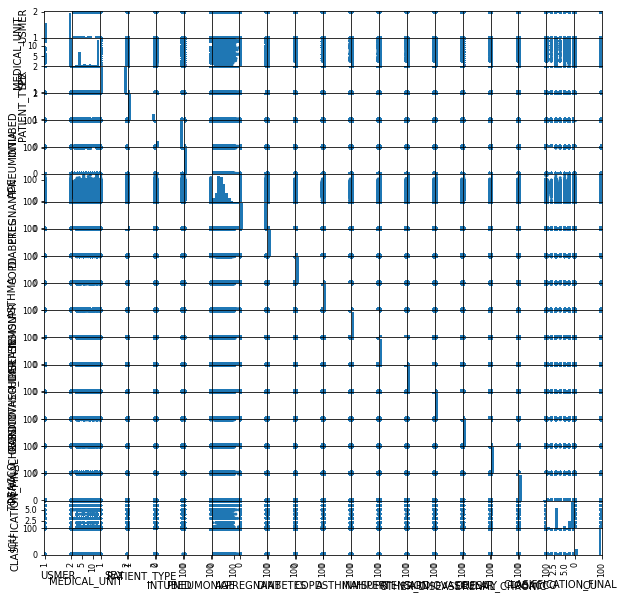

In [ ]:
pd.plotting.scatter_matrix(data, figsize=(10, 10), alpha=1)
pass

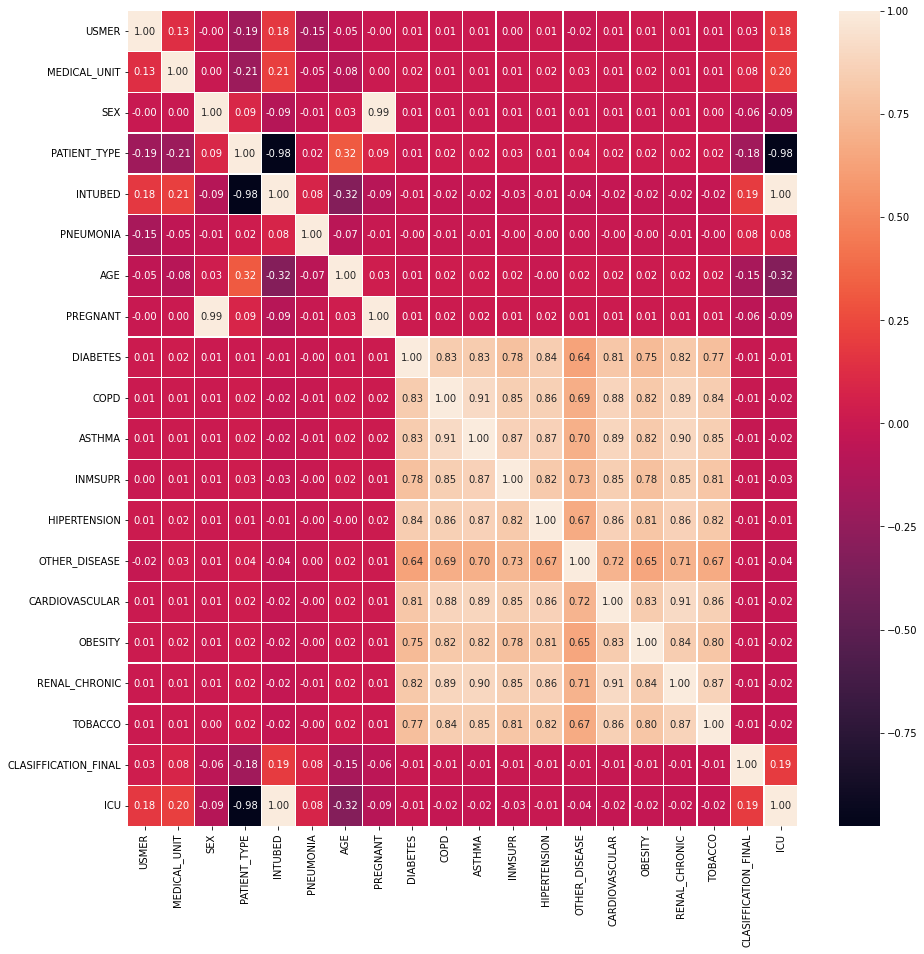

In [ ]:
fig, axes = plt.subplots(figsize=(15, 15))
sns.heatmap(X_train[:].corr(), annot=True, cmap = 'rocket',linewidths=.3,fmt=".2f")
plt.show()

В матрице наблюдаются сильные зависимости некоторых признаков, некоторые дропнем в пунктах 5-10 (INTUBED,ICU, DATE_DIED)

# 5-10 - Обработка значений и признаков

In [ ]:
def get_unique_vals(data):
    for column in data:
        try:
            unique_vals = np.unique(data[column])
        except:
            unique_vals = data[column].unique()

        nr_values = len(unique_vals)
        if nr_values < 10:
            print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
        else:
            print('The number of values for feature {} :{}'.format(column, nr_values))

In [ ]:
print('Percentage of missing values')
for col in data.columns :
    print('{:<20} => {:>10.2f}%'.format(col, len(data[(data[col]==98) | (data[col]==99) | (data[col]==97)])/len(data)*100))

Percentage of missing values
USMER                =>       0.00%
MEDICAL_UNIT         =>       0.00%
SEX                  =>       0.00%
PATIENT_TYPE         =>       0.00%
DATE_DIED            =>       0.00%
INTUBED              =>      81.62%
PNEUMONIA            =>       1.53%
AGE                  =>       0.03%
PREGNANT             =>      50.28%
DIABETES             =>       0.32%
COPD                 =>       0.29%
ASTHMA               =>       0.28%
INMSUPR              =>       0.32%
HIPERTENSION         =>       0.30%
OTHER_DISEASE        =>       0.48%
CARDIOVASCULAR       =>       0.29%
OBESITY              =>       0.29%
RENAL_CHRONIC        =>       0.29%
TOBACCO              =>       0.31%
CLASIFFICATION_FINAL =>       0.00%
ICU                  =>      81.64%


In [ ]:
data["DEATH"] = [2 if each=="9999-99-99" else 1 for each in data.DATE_DIED]

data=data.drop(columns=['INTUBED','ICU','DATE_DIED'],axis=0)

get_unique_vals(data)


The number of values for feature USMER :2 -- [1 2]
The number of values for feature MEDICAL_UNIT :13
The number of values for feature SEX :2 -- [1 2]
The number of values for feature PATIENT_TYPE :2 -- [1 2]
The number of values for feature PNEUMONIA :3 -- [ 1  2 99]
The number of values for feature AGE :121
The number of values for feature PREGNANT :4 -- [ 1  2 97 98]
The number of values for feature DIABETES :3 -- [ 1  2 98]
The number of values for feature COPD :3 -- [ 1  2 98]
The number of values for feature ASTHMA :3 -- [ 1  2 98]
The number of values for feature INMSUPR :3 -- [ 1  2 98]
The number of values for feature HIPERTENSION :3 -- [ 1  2 98]
The number of values for feature OTHER_DISEASE :3 -- [ 1  2 98]
The number of values for feature CARDIOVASCULAR :3 -- [ 1  2 98]
The number of values for feature OBESITY :3 -- [ 1  2 98]
The number of values for feature RENAL_CHRONIC :3 -- [ 1  2 98]
The number of values for feature TOBACCO :3 -- [ 1  2 98]
The number of values for fe

In [ ]:
binary = ['PNEUMONIA','DIABETES', 'COPD', 'ASTHMA', 'INMSUPR','HIPERTENSION', 
        'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY','RENAL_CHRONIC', 'TOBACCO']

for col in binary :
    data = data[(data[col] == 1)|(data[col] == 2)]

# 11 - Построим матрицу корреляции и диаграмму рассеивания после обработки

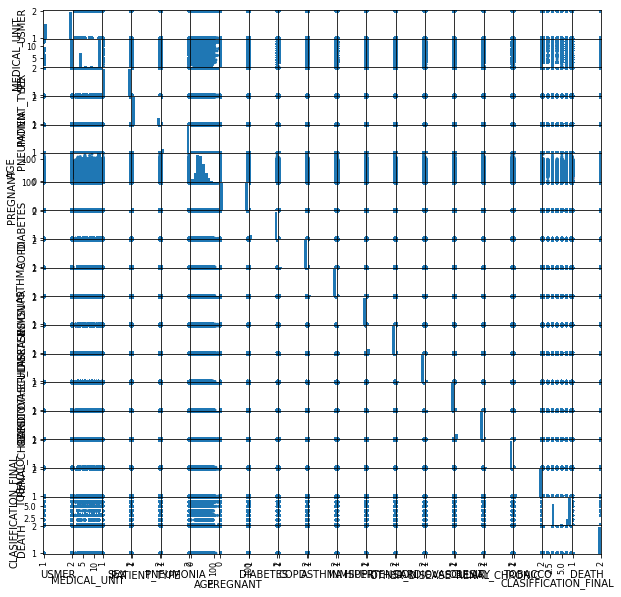

In [ ]:
pd.plotting.scatter_matrix(data, figsize=(10, 10), alpha=1)
pass

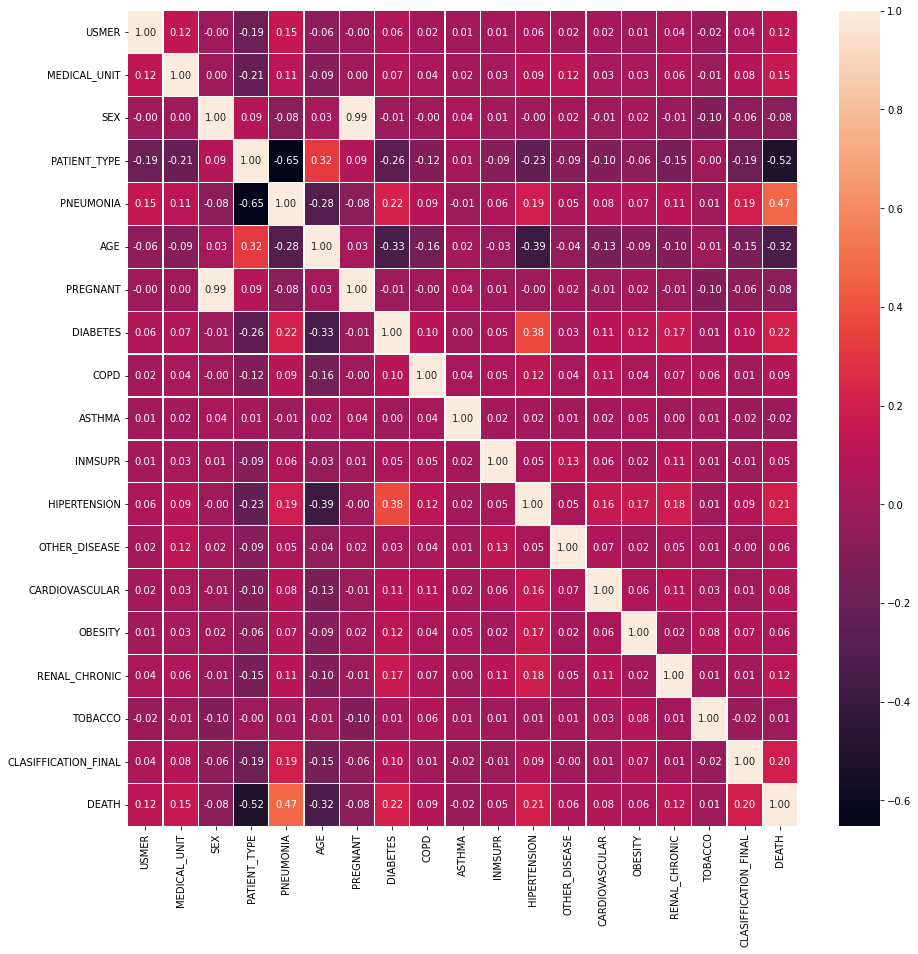

In [ ]:
fig, axes = plt.subplots(figsize=(15, 15))
sns.heatmap(data[:].corr(), annot=True, cmap = 'rocket',linewidths=.3,fmt=".2f")
plt.show()

Получили скорректированную корреляционную матрциу, теперь перейдем к классификации

# 12 - Классификация

In [ ]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ClassificationReport

Градиентный бустинг

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=42)

xgb_model = XGBClassifier()
xgb_model.fit(X_train, Y_train)
prediction_xgb = xgb_model.predict(X_test)
xgb_score = accuracy_score(Y_test, prediction_xgb)*100
print(f"The accuracy of the XGBoost Model on the validation data is {round(xgb_score, 2)}%")

KeyboardInterrupt: ignored

Логистическая регрессия

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)
prediction_logistic = logistic_model.predict(X_test)
logistic_score = accuracy_score(Y_test, prediction_logistic)*100
print(f"The accuracy of the Logistic Regression Model on the validation data is {round(logistic_score, 2)}%")

The accuracy of the Logistic Regression Model on the validation data is 92.72%


Случайные леса

In [ ]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, Y_train)
prediction_random = random_forest_model.predict(X_test)
random_forest_score = accuracy_score(Y_test, prediction_random)*100
print(f"The accuracy of the Random Forest Model on the validation data is {round(random_forest_score, 2)}%")

# 13 - Построение модели на оптимальных параметрах

# 14 - Результаты

Результаты хорошие для такого большого датасета и такого количества признаков

# 15 - Выводы

Метод градиентного бустинга работает немного лучше логистической регрессии и случайных лесов,